# Notebook 3: Random Forest Classification

In [ ]:
# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1359 non-null   int64  
 1   Name                    1359 non-null   object 
 2   Brand                   1359 non-null   object 
 3   Model                   1359 non-null   object 
 4   Battery capacity (mAh)  1359 non-null   int64  
 5   Screen size (inches)    1359 non-null   float64
 6   Touchscreen             1359 non-null   object 
 7   Resolution x            1359 non-null   int64  
 8   Resolution y            1359 non-null   int64  
 9   Processor               1359 non-null   int64  
 10  RAM (MB)                1359 non-null   int64  
 11  Internal storage (GB)   1359 non-null   float64
 12  Rear camera             1359 non-null   float64
 13  Front camera            1359 non-null   float64
 14  Operating system        1359 non-null   

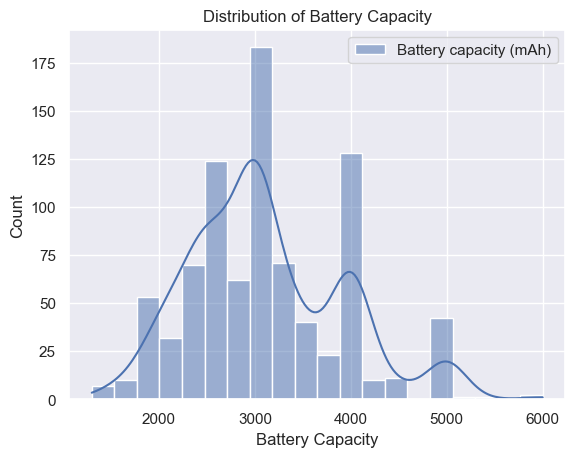

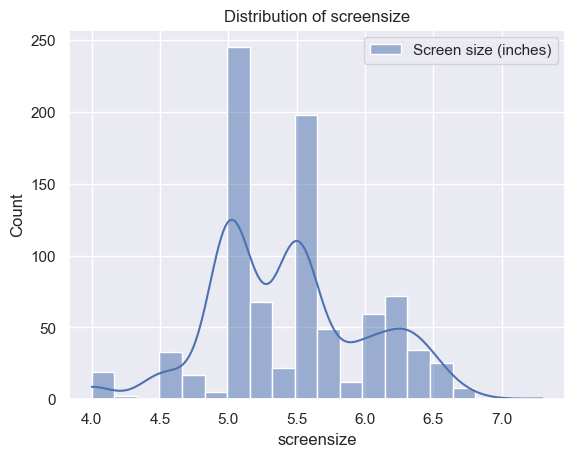

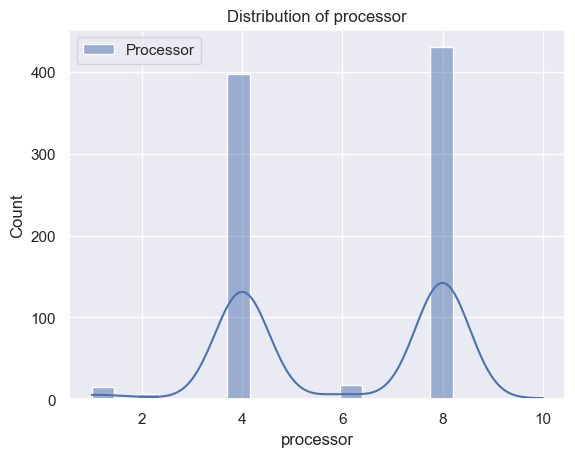

Number of Unique Values for Processor: 6
Unique Processors:
[ 8  6  1  4 10  2]


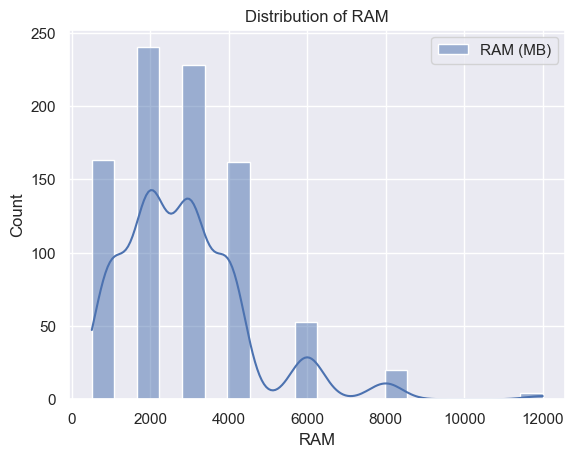

Number of Unique Values for RAMs: 9
Unique RAMs:
[12000  6000  4000  8000  3000  2000  1000   512   768]


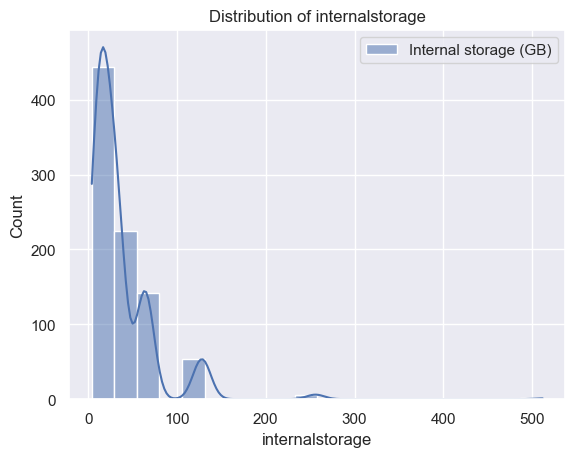

Number of Unique Values for Internal storage: 8
Unique Internal storage:
[256.  64. 128.  32.  16.   8. 512.   4.]


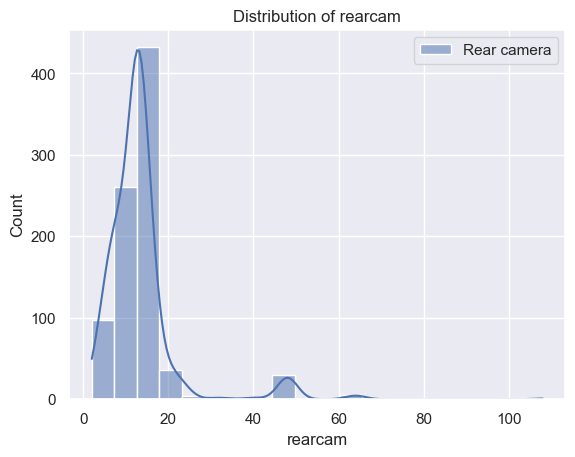

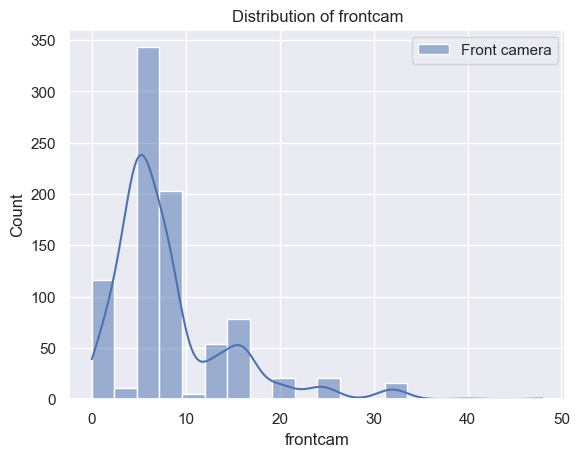

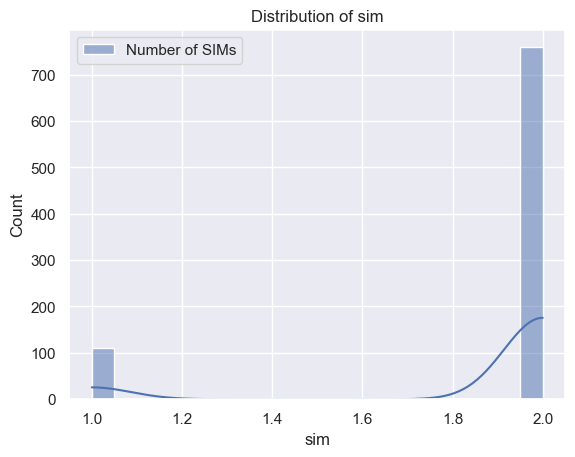

Number of Unique Values for SIMs: 2
Unique Number of SIMs:
[2 1]


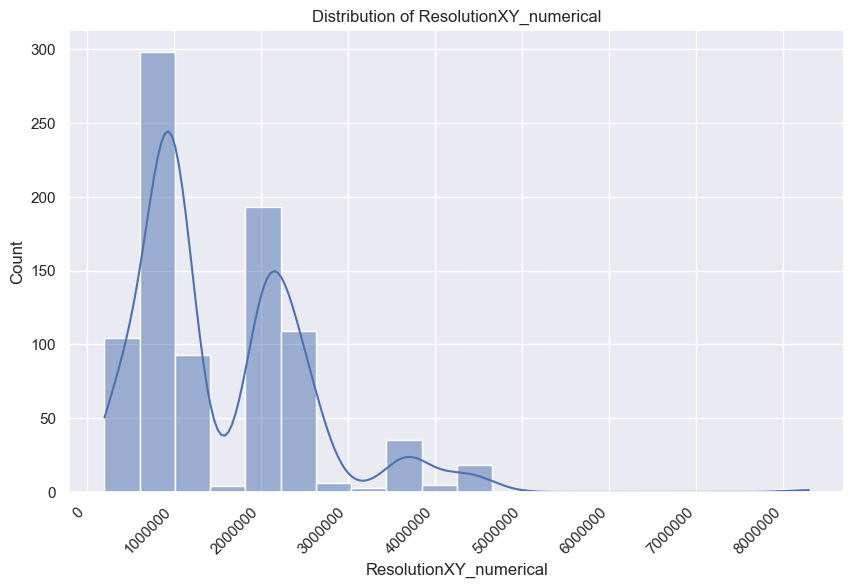

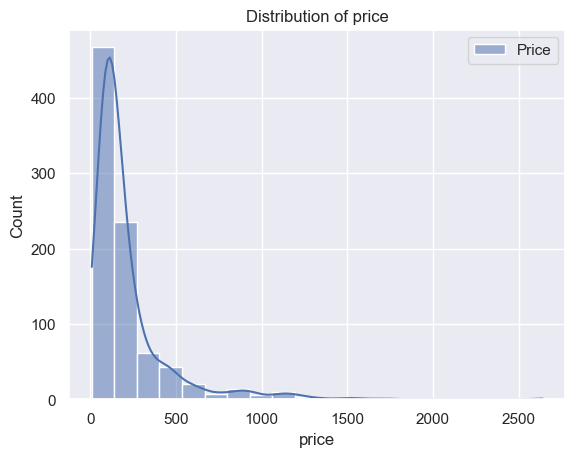

C:\Users\caiji\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


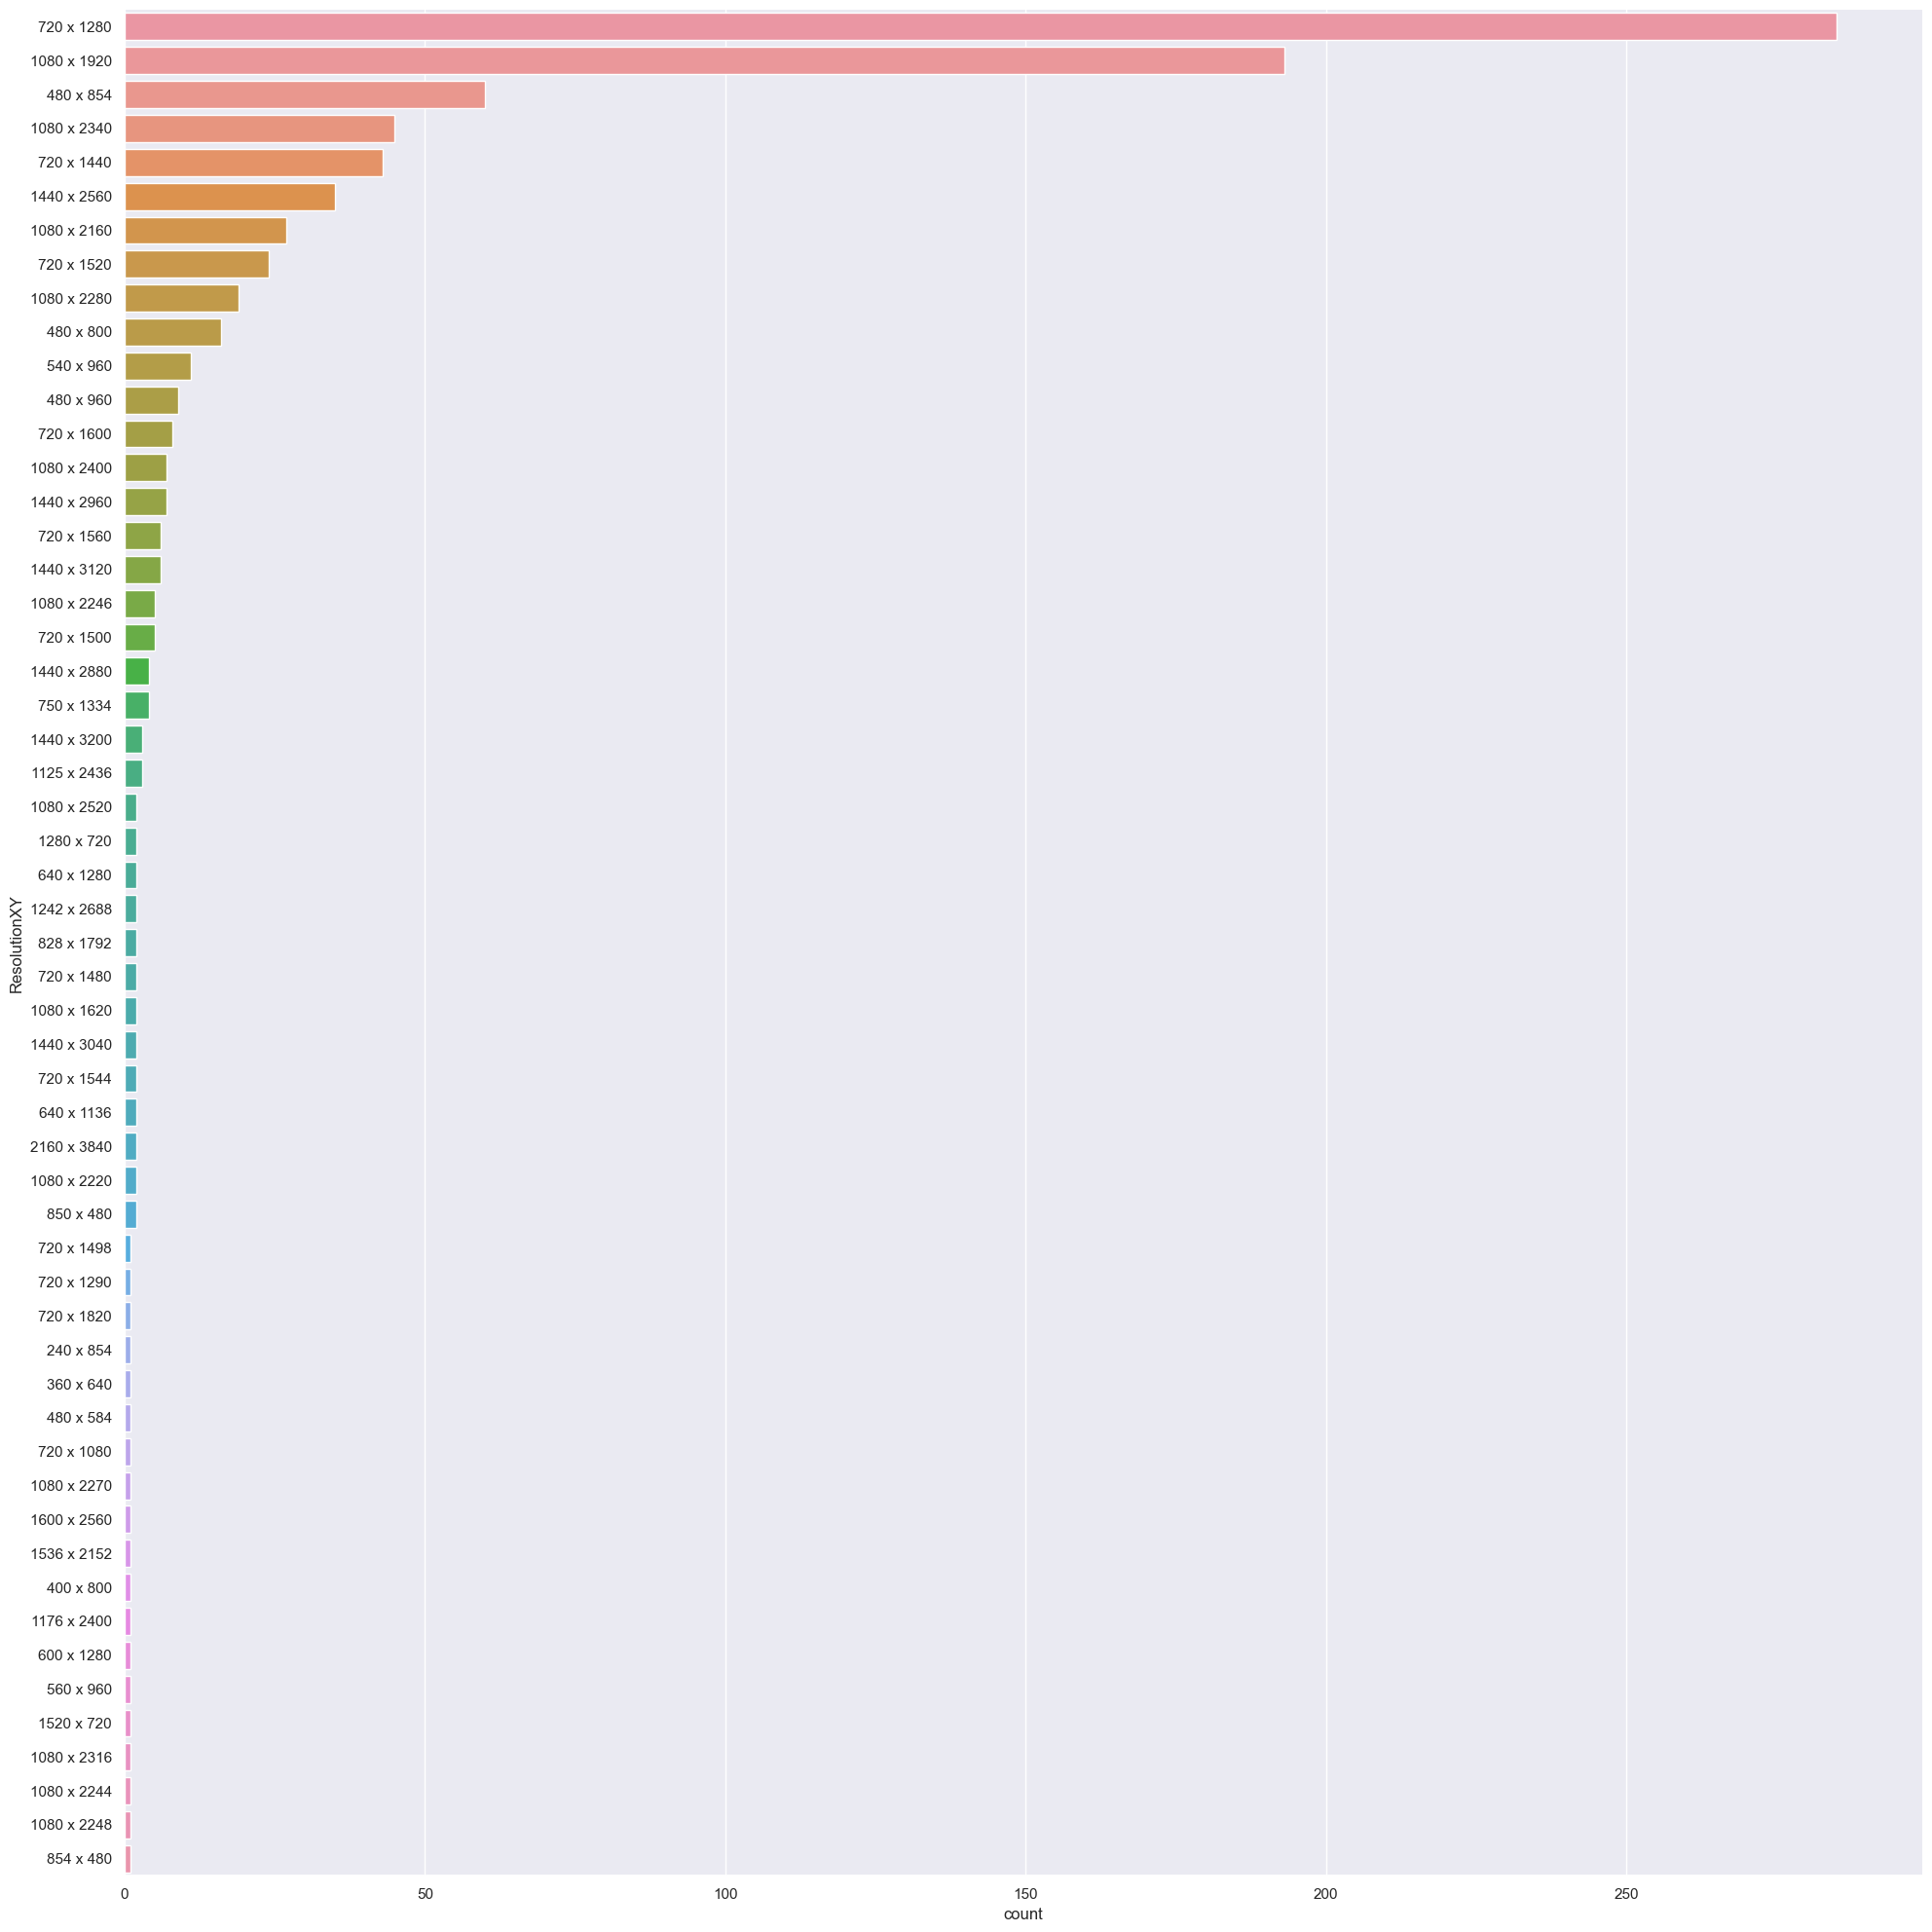

C:\Users\caiji\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


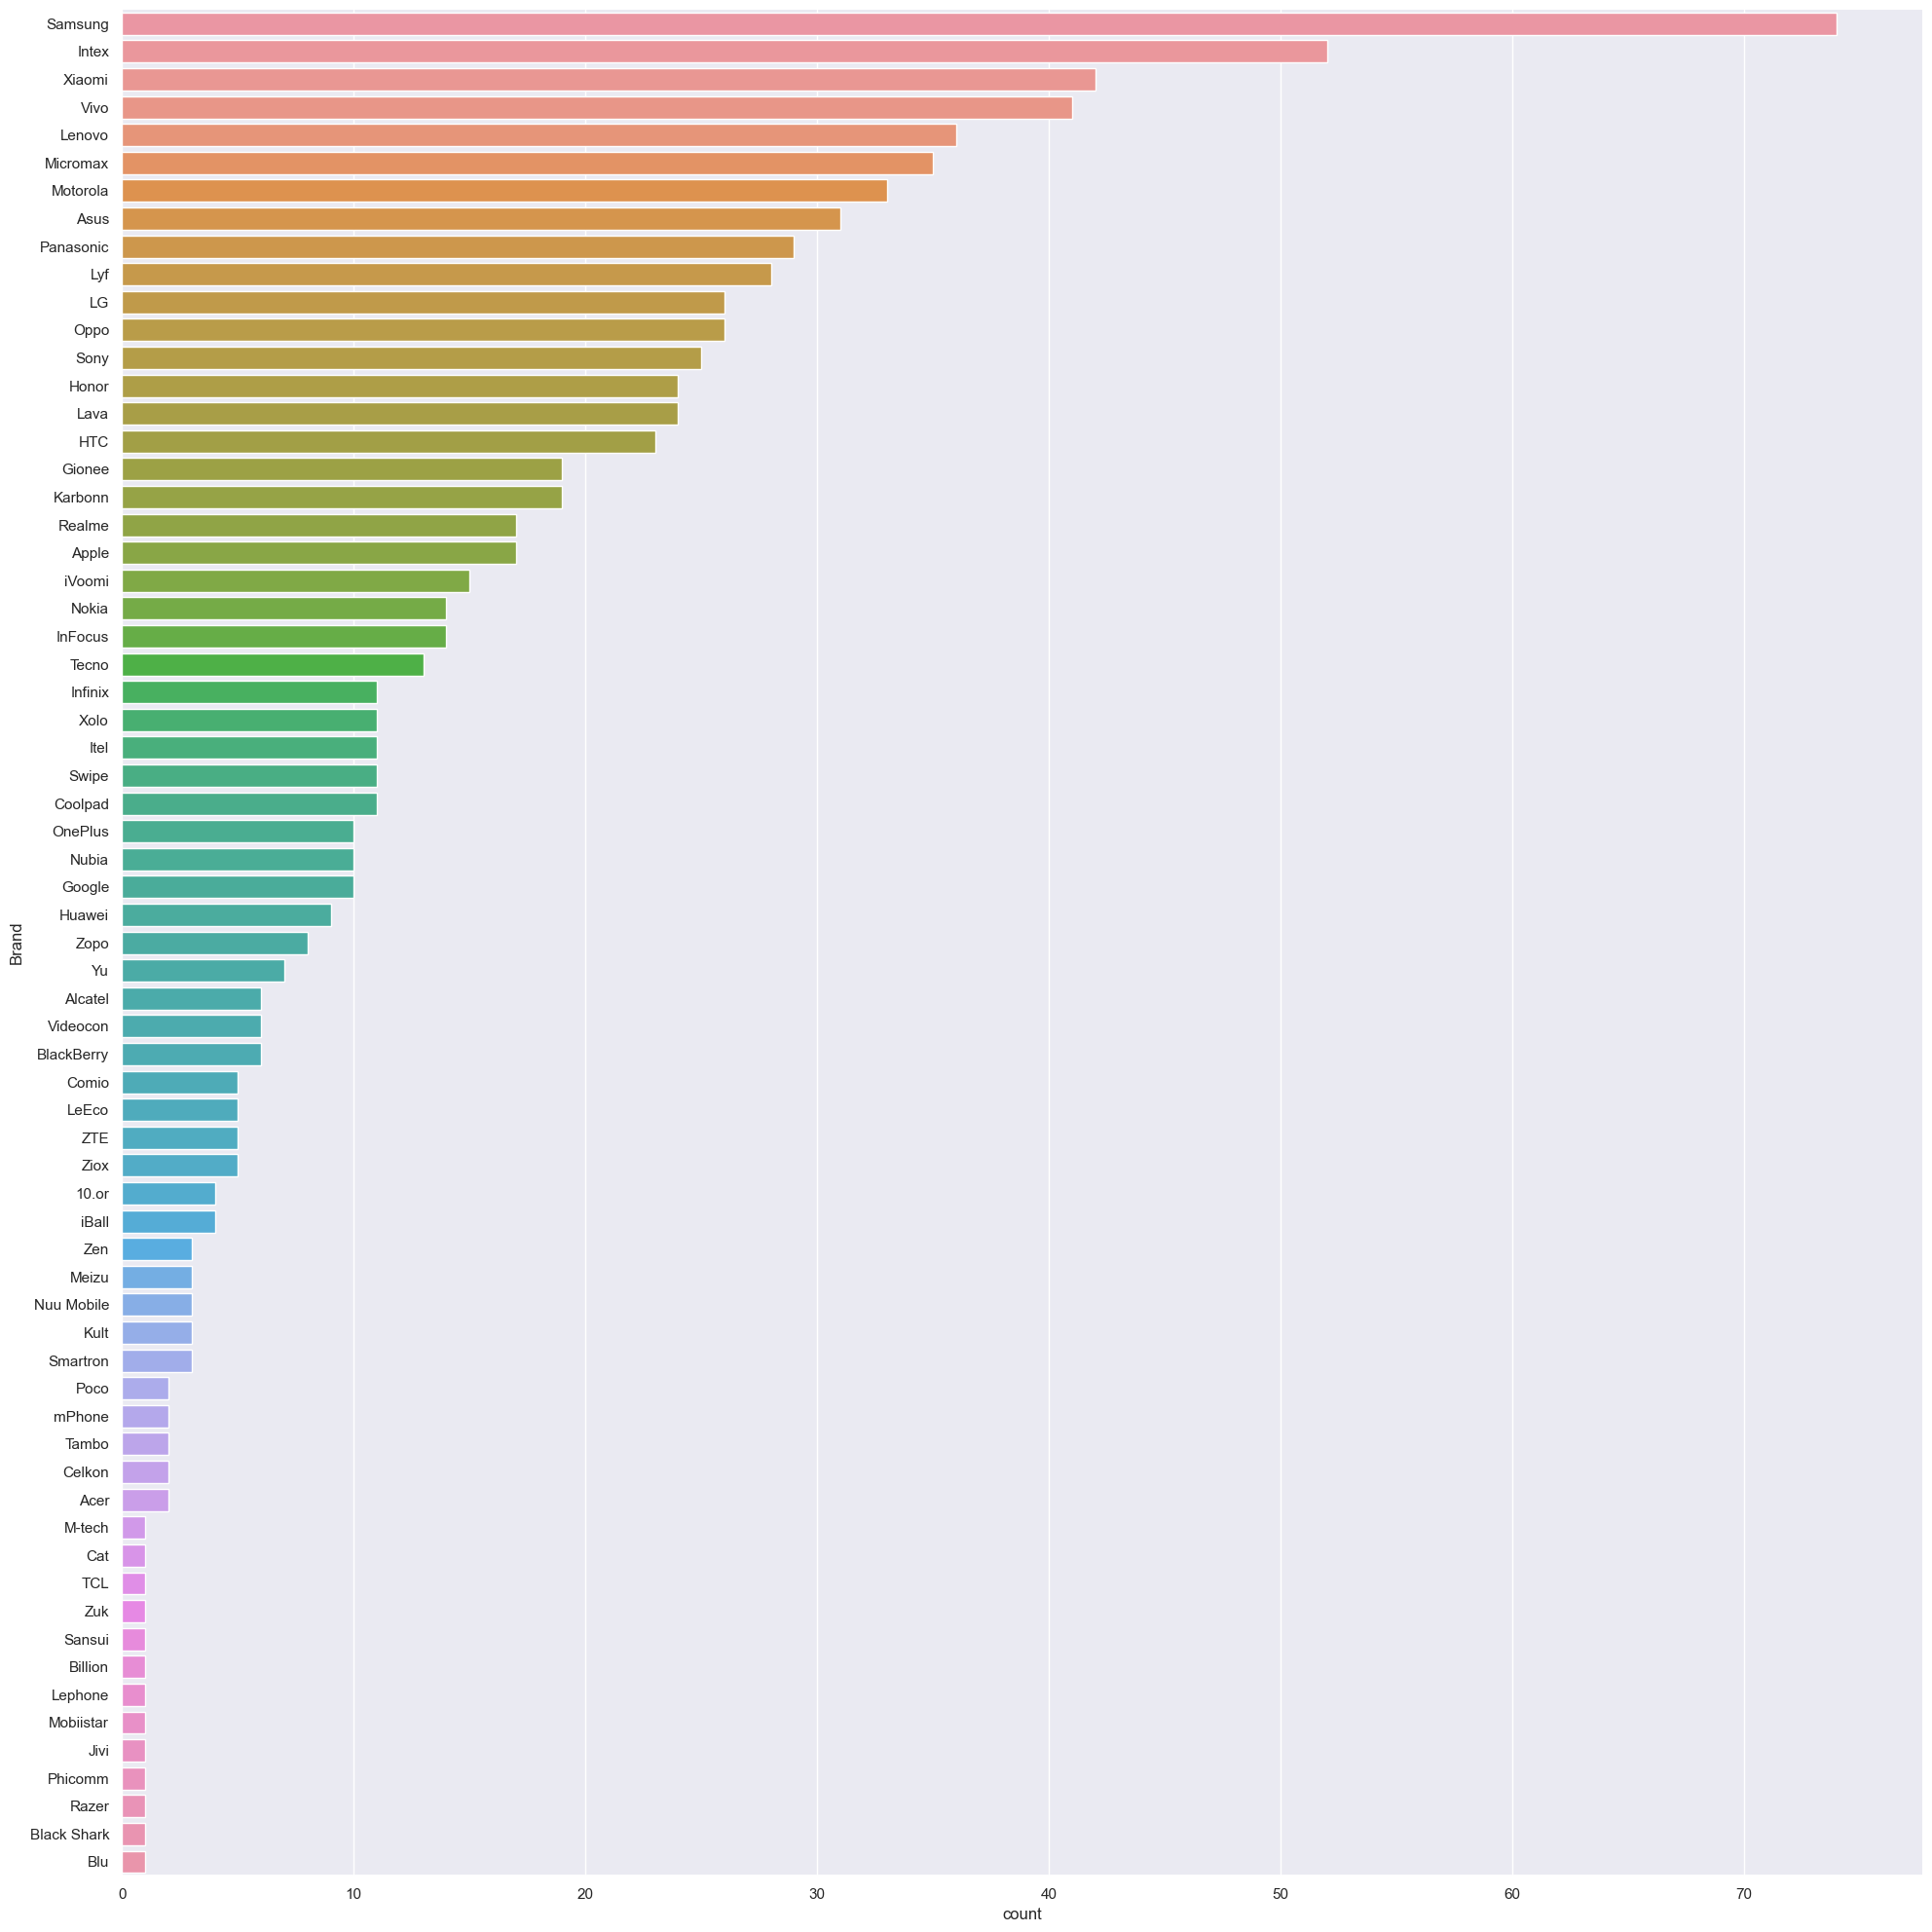

C:\Users\caiji\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


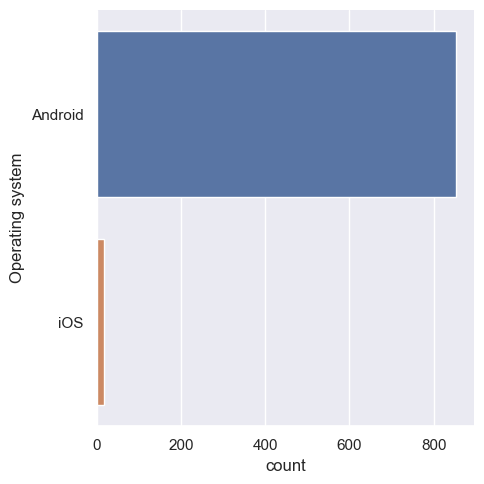

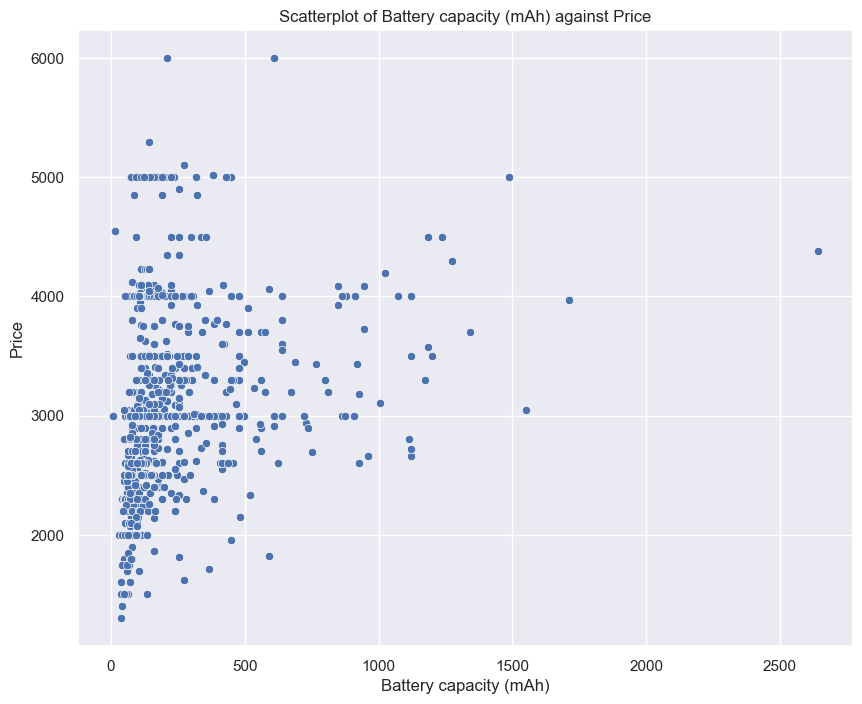

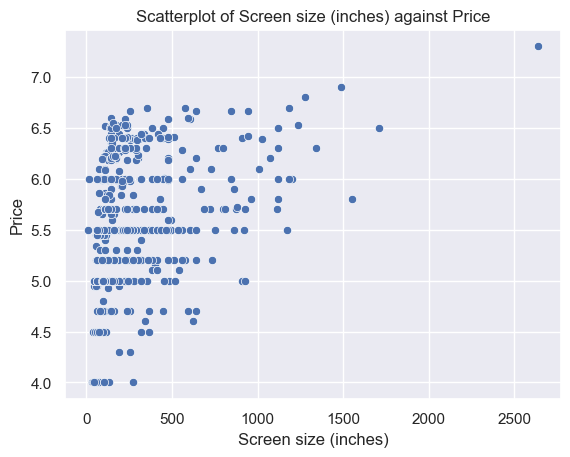

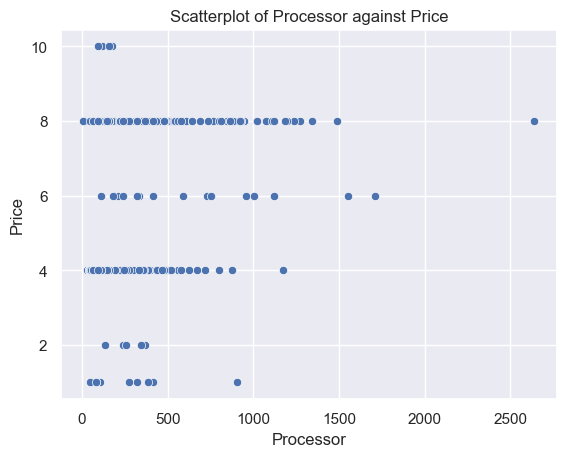

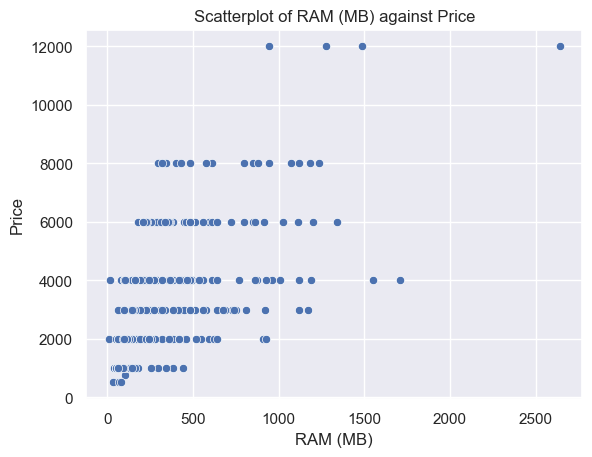

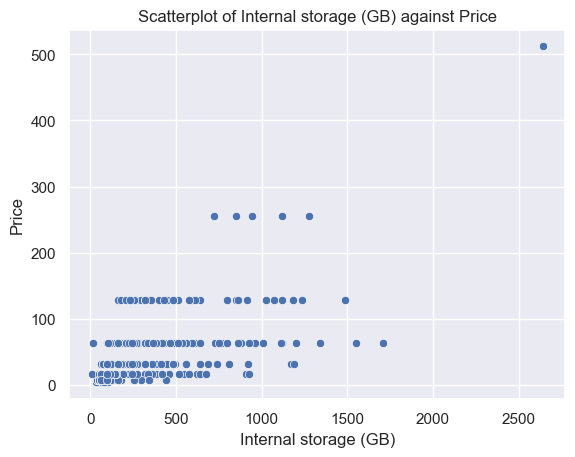

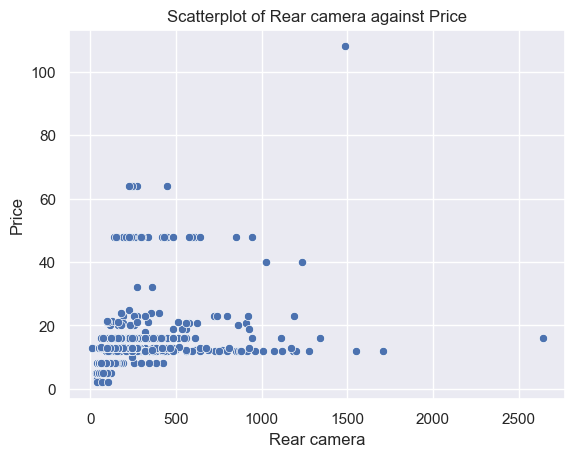

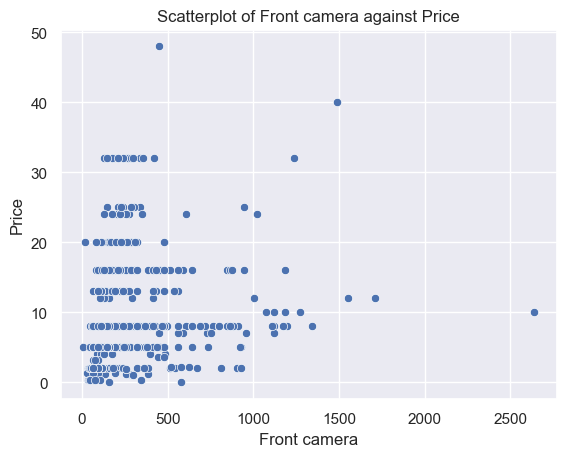

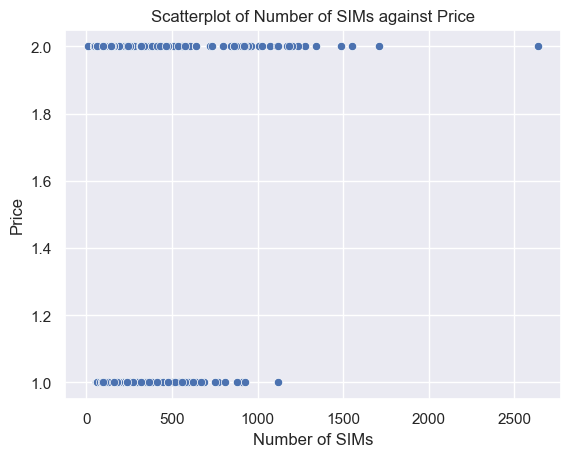

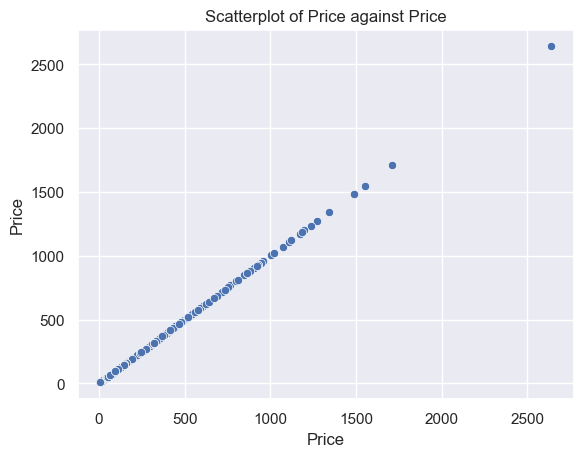

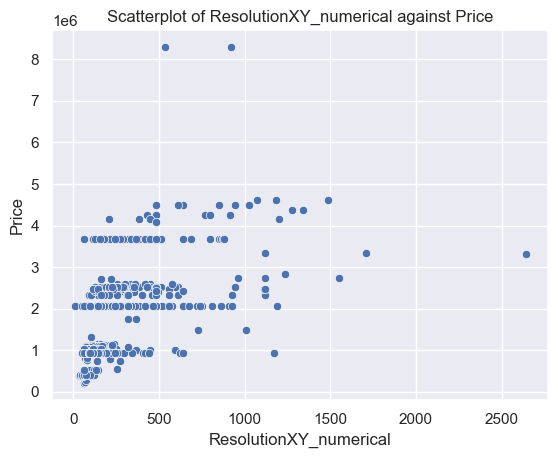

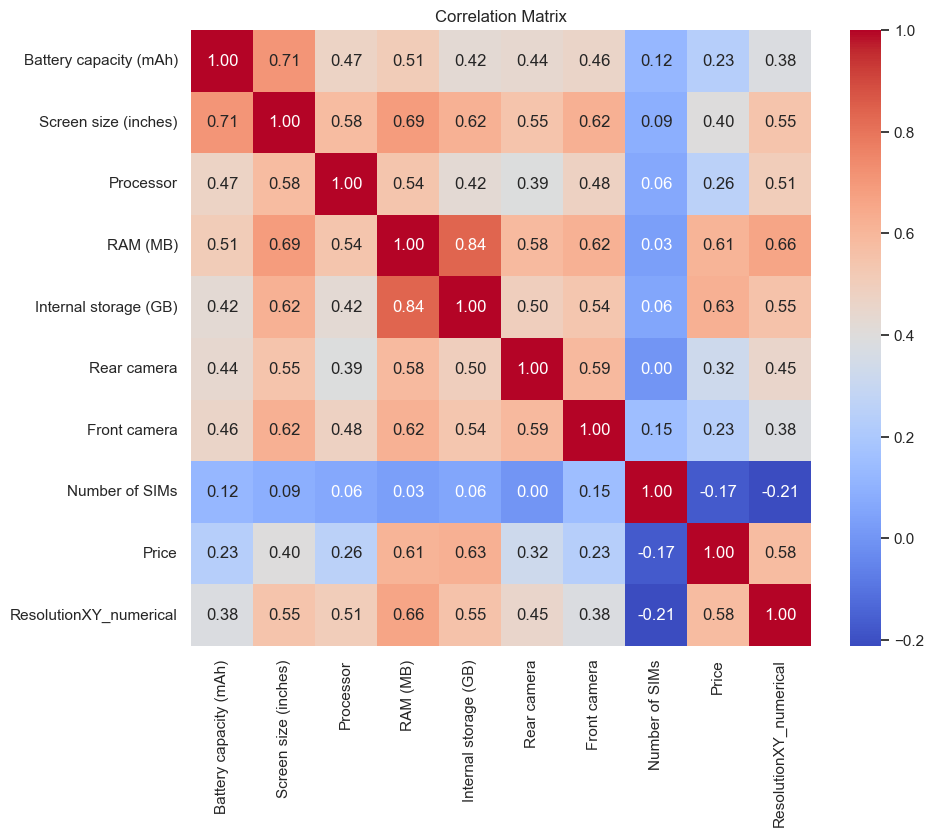

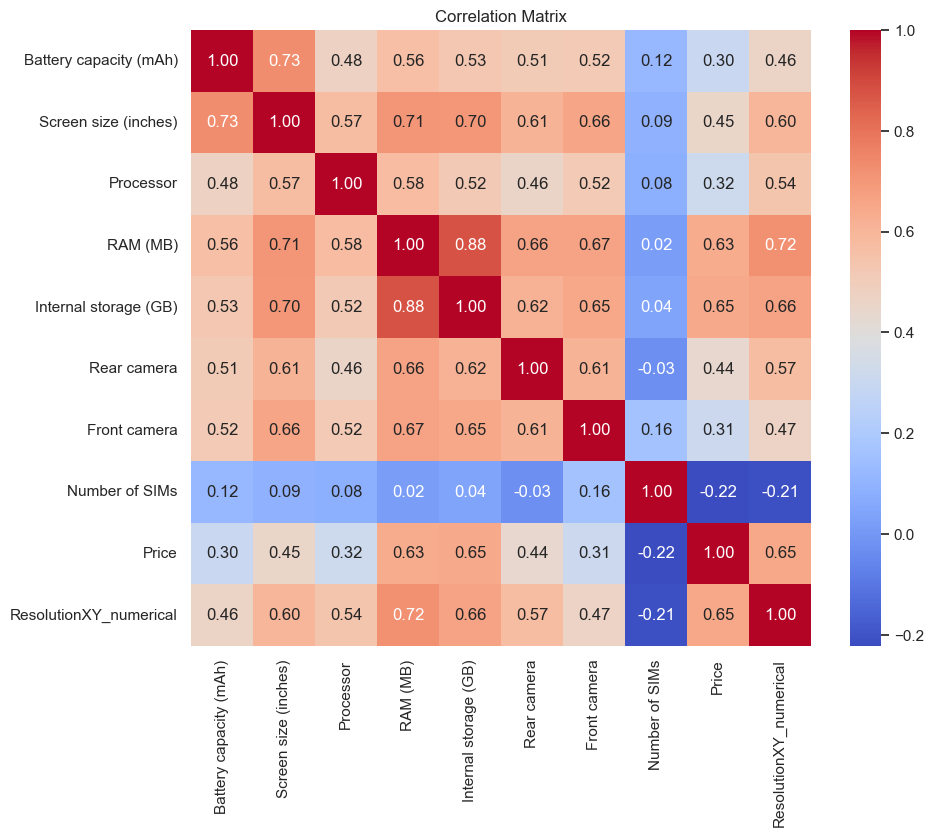

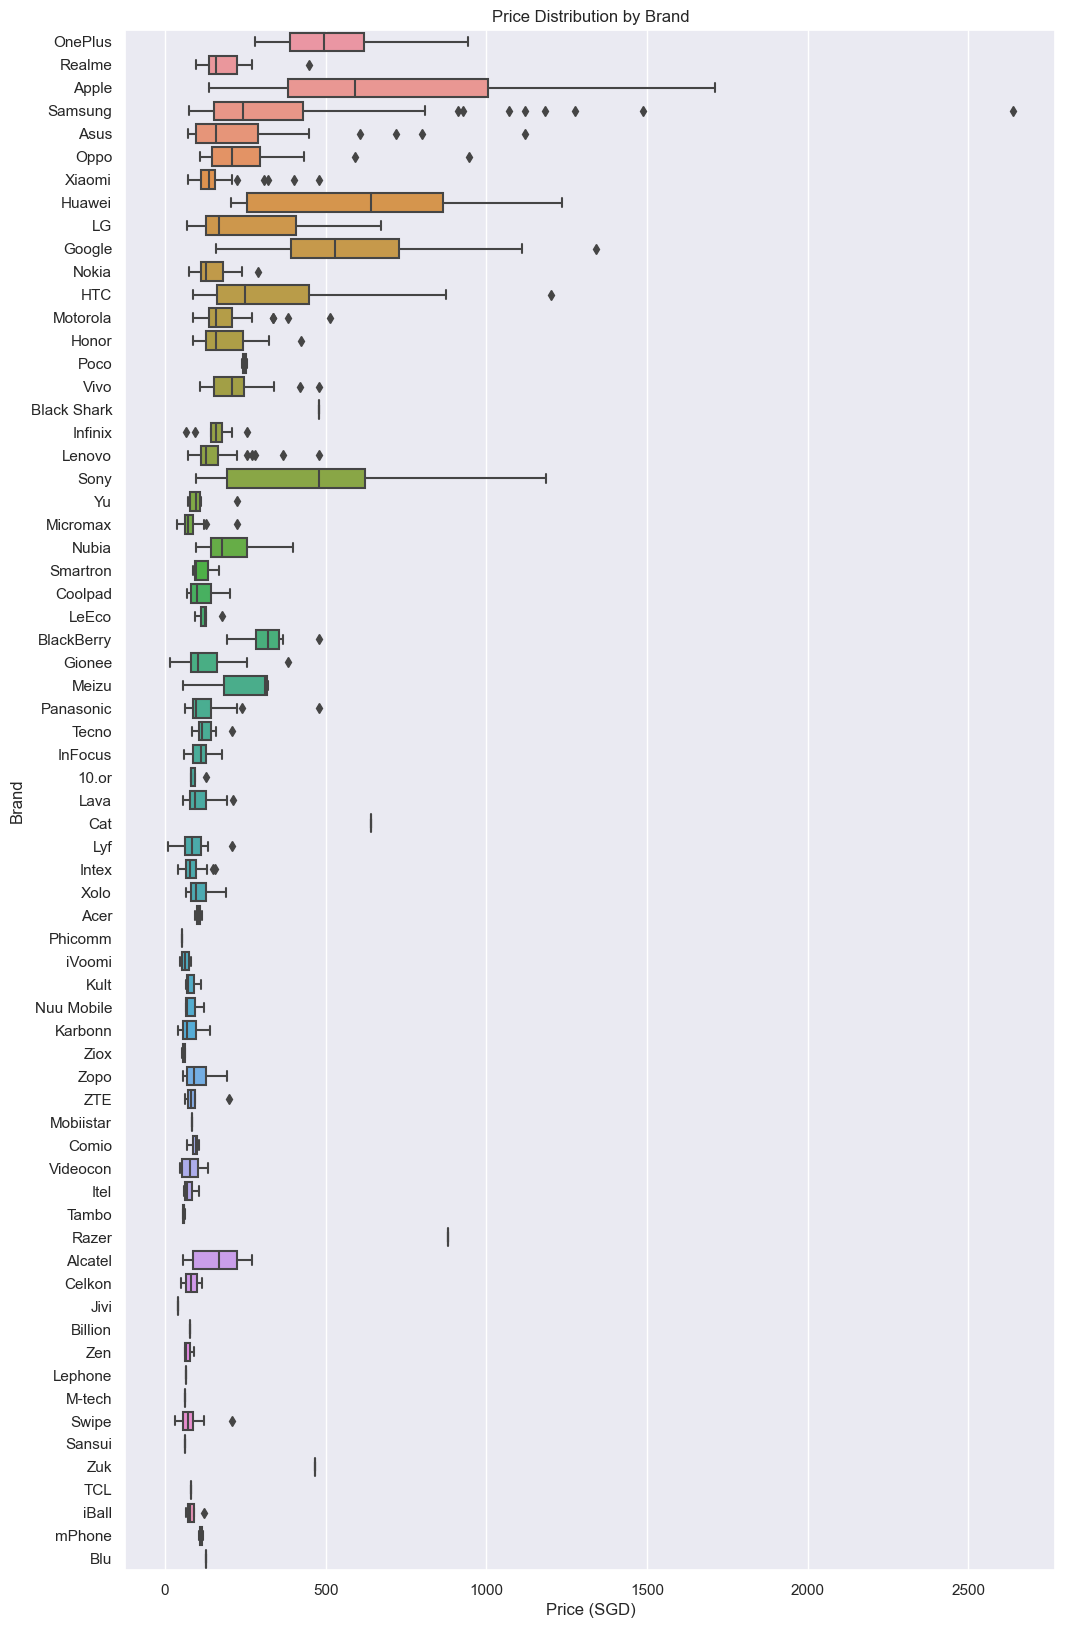

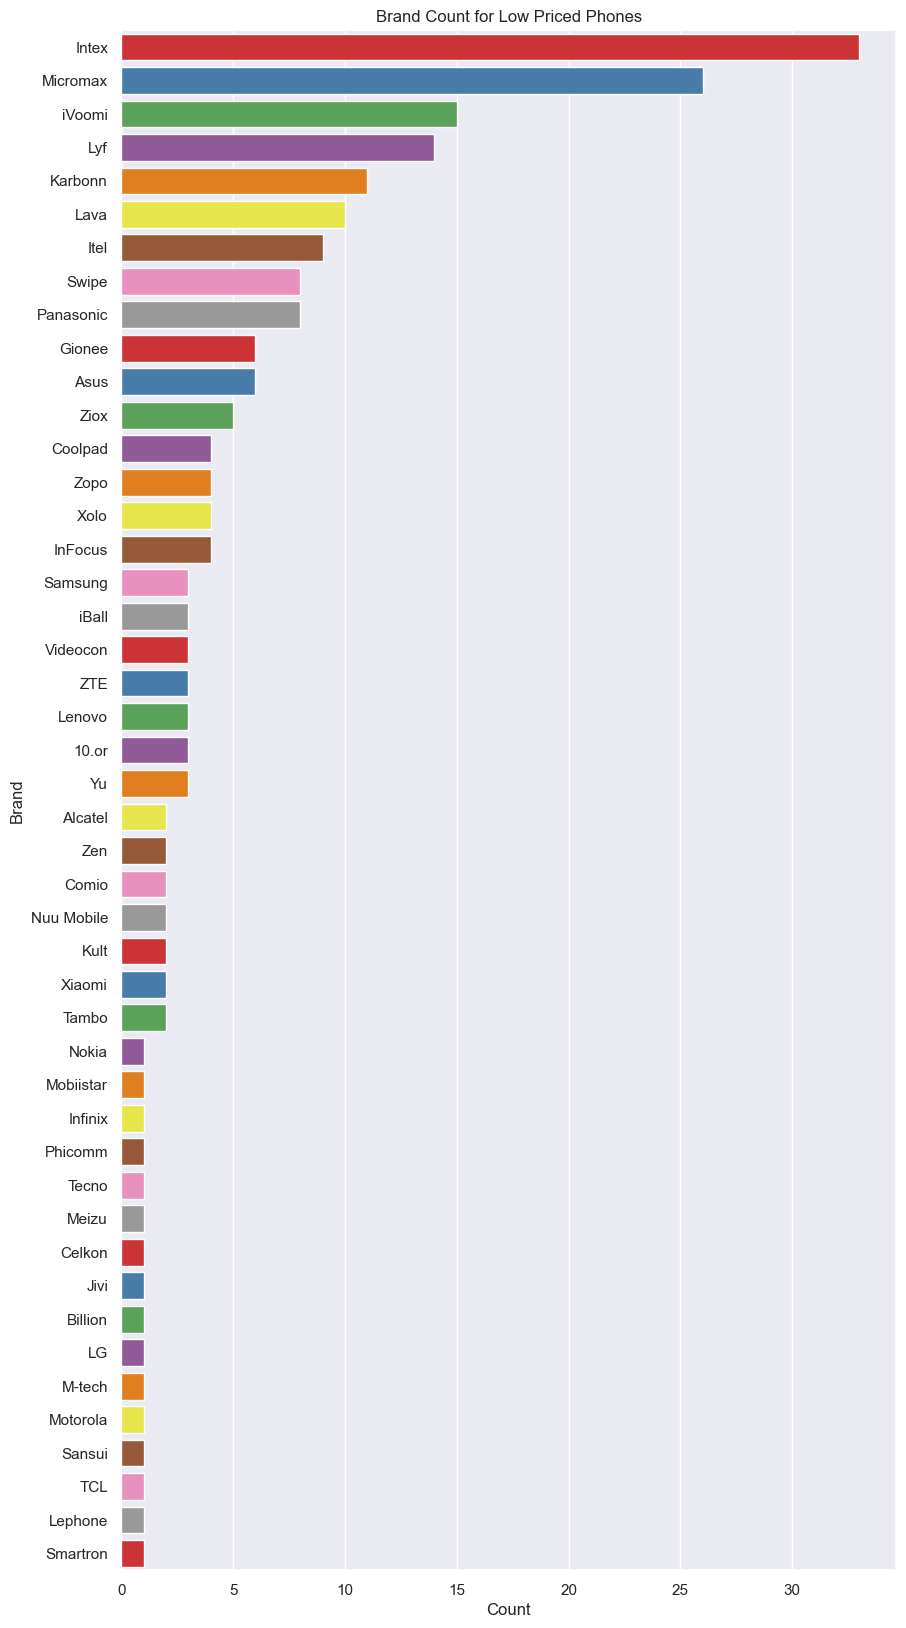

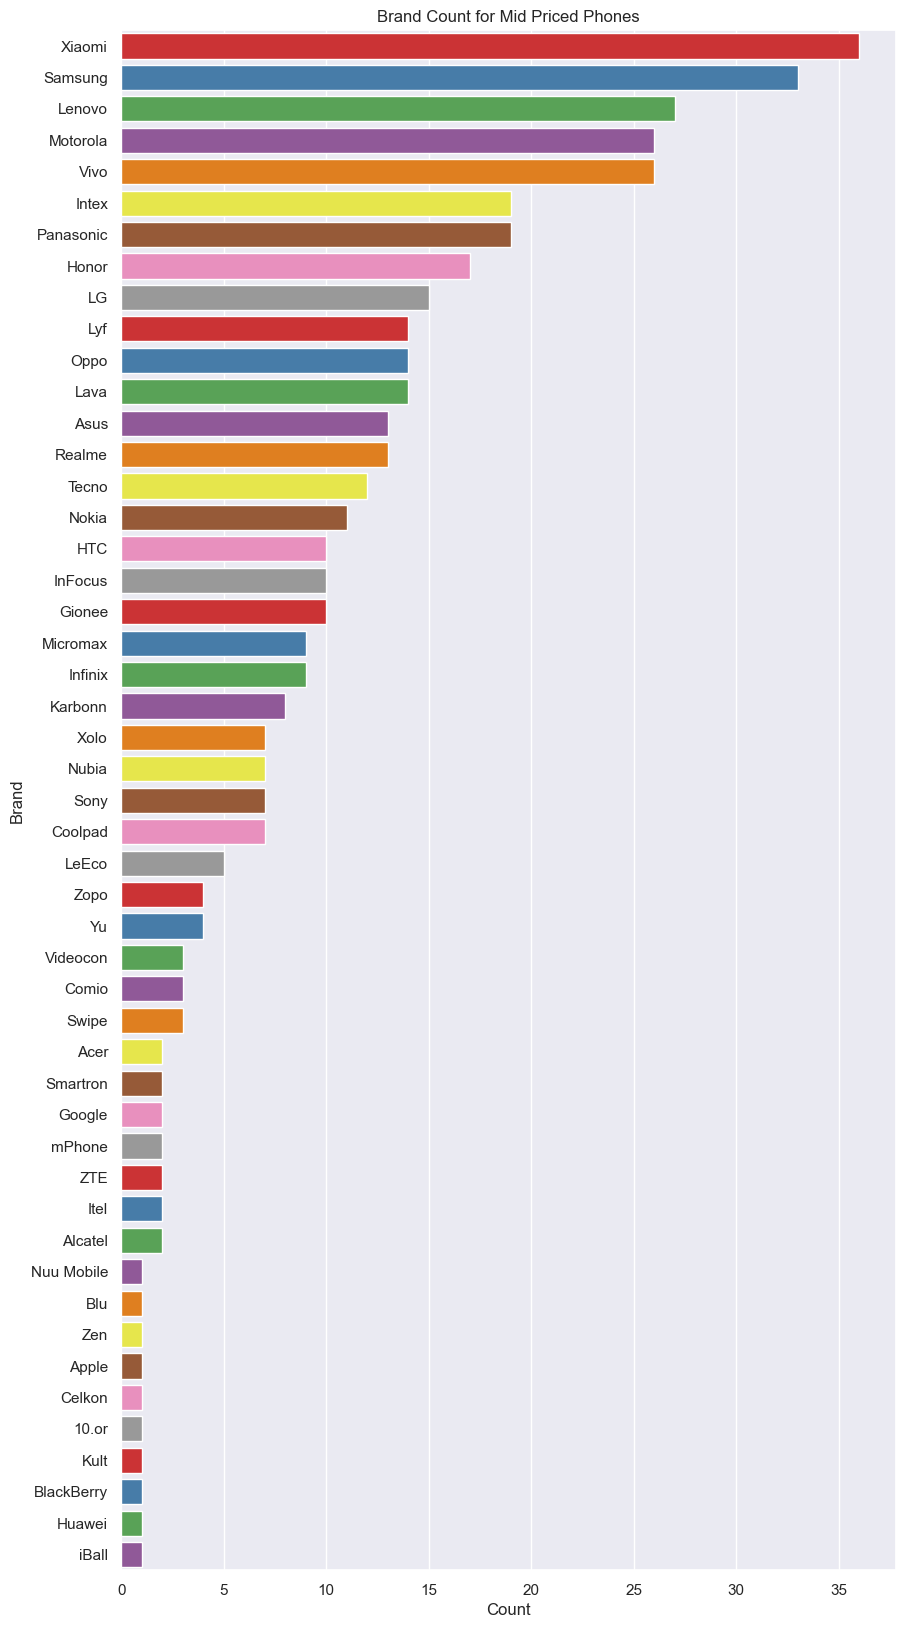

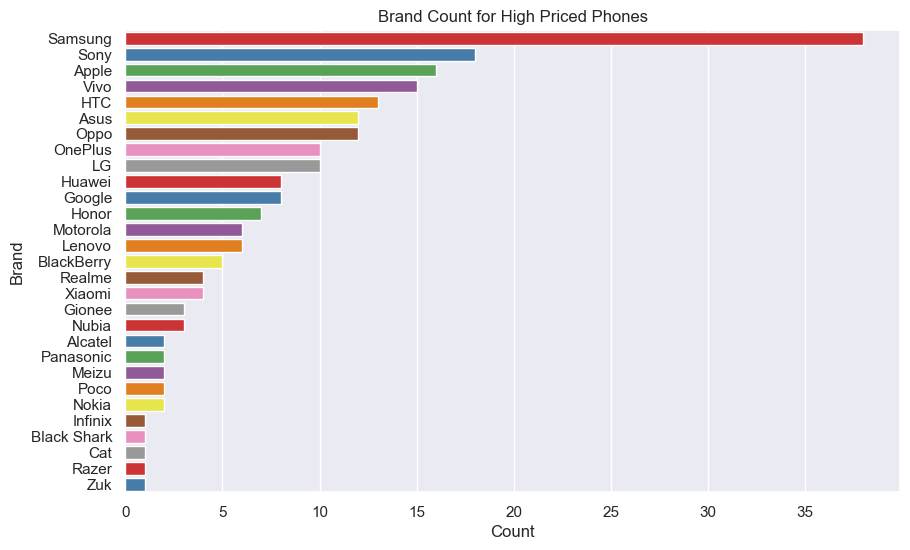

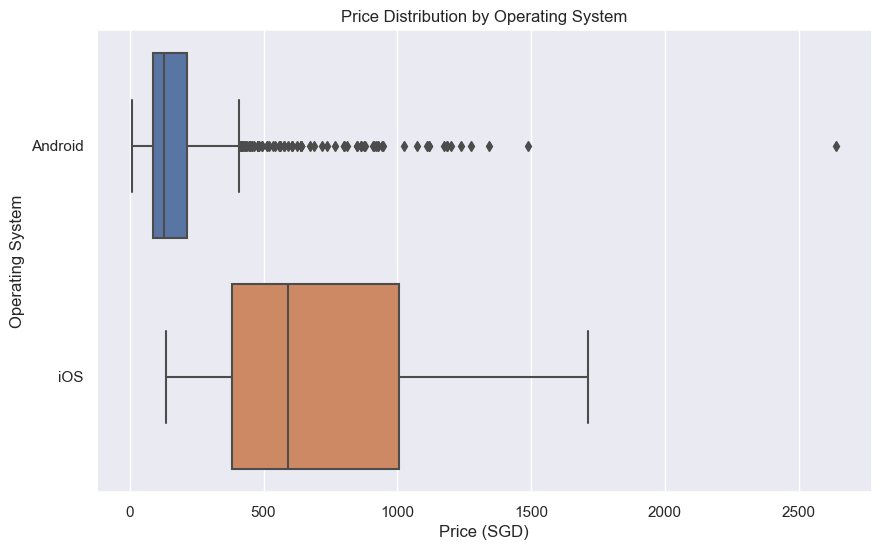

In [2]:
%run Extraction_And_EDA.ipynb 

In [3]:
mData


,Index,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),...,Front camera,Operating system,Number of SIMs,Price,ResolutionXY,ResolutionXY_numerical,Price_Category,RAM (MB) norm,Internal storage (GB) norm,ResolutionXY_numerical norm
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,1440,3120,8,12000,...,16.0,Android,2,943.97,1440 x 3120,4492800,High,109.544512,16.000000,2119.622608
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,1080,2400,8,6000,...,16.0,Android,2,447.98,1080 x 2400,2592000,High,77.459667,8.000000,1609.968944
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,1242,2688,6,4000,...,12.0,iOS,2,1710.40,1242 x 2688,3338496,High,63.245553,8.000000,1827.155166
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,828,1792,6,4000,...,12.0,iOS,2,1006.40,828 x 1792,1483776,High,63.245553,8.000000,1218.103444
6,6,OnePlus 7T Pro,OnePlus,7T Pro,4085,6.67,1440,3120,8,8000,...,16.0,Android,2,847.84,1440 x 3120,4492800,High,89.442719,16.000000,2119.622608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Lava Iris X5 4G,Lava,Iris X5 4G,2500,5.00,720,1280,4,2000,...,8.0,Android,1,111.98,720 x 1280,921600,Mid,44.721360,4.000000,960.000000
1335,1335,Asus ZenFone 2 Laser (ZE500KL),Asus,ZenFone 2 Laser (ZE500KL),2070,5.00,720,1280,4,2000,...,5.0,Android,2,95.84,720 x 1280,921600,Mid,44.721360,2.828427,960.000000
1336,1336,Sony Xperia M5,Sony,Xperia M5,2600,5.00,1080,1920,8,3000,...,13.0,Android,1,95.98,1080 x 1920,2073600,Mid,54.772256,4.000000,1440.000000
1337,1337,Sony Xperia C5 Ultra,Sony,Xperia C5 Ultra,2930,6.00,1080,1920,8,2000,...,13.0,Android,1,415.84,1080 x 1920,2073600,High,44.721360,4.000000,1440.000000


# Encoding of categorical variable (Brand)

In [4]:
label_encoder = LabelEncoder()
mData['Brand_Encoded'] = label_encoder.fit_transform(mData['Brand'])


# Selection of features and target variable

We will be predicting Price Category based on the following variables:
- Brand
- RAM
- Internal storage
- ResolutionXY_numerical

In [5]:
features = ['Brand_Encoded', 'RAM (MB) norm', 'Internal storage (GB) norm', 'ResolutionXY_numerical norm']
target = 'Price_Category'

# Splitting of data

In [6]:
X = mData[features]
y = mData[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training of model

In [7]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)






RandomForestClassifier(random_state=42)

# Evaluation

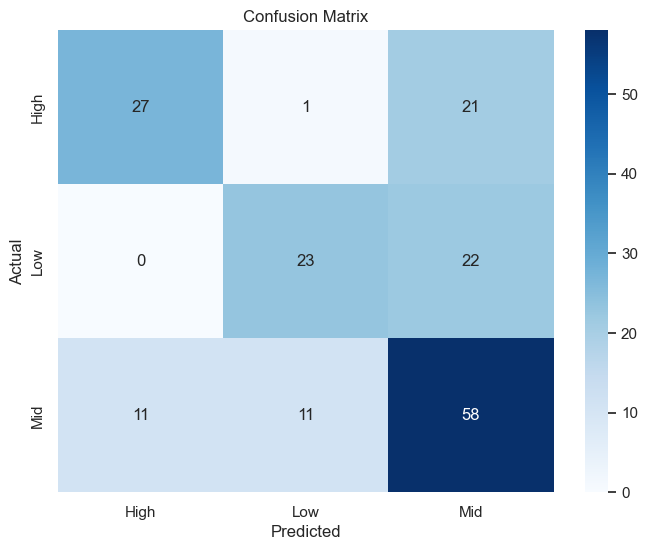

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Individual Cat
unique_classes = rf_classifier.classes_
for i, class_name in enumerate(unique_classes):
    true_positives = conf_matrix[i, i]
    false_positives = conf_matrix[:, i].sum() - true_positives
    false_negatives = conf_matrix[i, :].sum() - true_positives
    true_negatives = conf_matrix.sum() - true_positives - false_positives - false_negatives
    
    tpr = true_positives / (true_positives + false_negatives)
    fpr = false_positives / (false_positives + true_negatives)
    tnr = true_negatives / (true_negatives + false_positives)
    fnr = false_negatives / (false_positives + true_negatives)
    
    print(f"Price Category: {class_name}")
    print(f"True Positive Rate: {tpr}")
    print(f"False Positive Rate: {fpr}")
    print(f"True Negative Rate: {tnr}")
    print(f"False Negative Rate: {fnr}")
    print()

# Overall
total_true_positives = 0
total_false_positives = 0
total_false_negatives = 0
total_true_negatives = 0

for i in range(len(unique_classes)):
    true_positives = conf_matrix[i, i]
    false_positives = conf_matrix[:, i].sum() - true_positives
    false_negatives = conf_matrix[i, :].sum() - true_positives
    true_negatives = conf_matrix.sum() - true_positives - false_positives - false_negatives

    total_true_positives += true_positives
    total_false_positives += false_positives
    total_false_negatives += false_negatives
    total_true_negatives += true_negatives

overall_tpr = total_true_positives / (total_true_positives + total_false_negatives)
overall_fpr = total_false_positives / (total_false_positives + total_true_negatives)
overall_tnr = total_true_negatives / (total_true_negatives + total_false_positives)
overall_fnr = total_false_negatives / (total_false_positives + total_true_negatives)

print("Overall True Positive Rate (Recall):", overall_tpr)
print("Overall False Positive Rate:", overall_fpr)
print("Overall True Negative Rate:", overall_tnr)
print("Overall False Negative Rate:", overall_fnr)


Price Category: High
True Positive Rate: 0.5510204081632653
False Positive Rate: 0.088
True Negative Rate: 0.912
False Negative Rate: 0.176

Price Category: Low
True Positive Rate: 0.5111111111111111
False Positive Rate: 0.09302325581395349
True Negative Rate: 0.9069767441860465
False Negative Rate: 0.17054263565891473

Price Category: Mid
True Positive Rate: 0.725
False Positive Rate: 0.4574468085106383
True Negative Rate: 0.5425531914893617
False Negative Rate: 0.23404255319148937

Overall True Positive Rate (Recall): 0.6206896551724138
Overall False Positive Rate: 0.1896551724137931
Overall True Negative Rate: 0.8103448275862069
Overall False Negative Rate: 0.1896551724137931


# Visualisation of data

We will only visualise a portion of the decision tree since there are too many nodes due to the large data size.

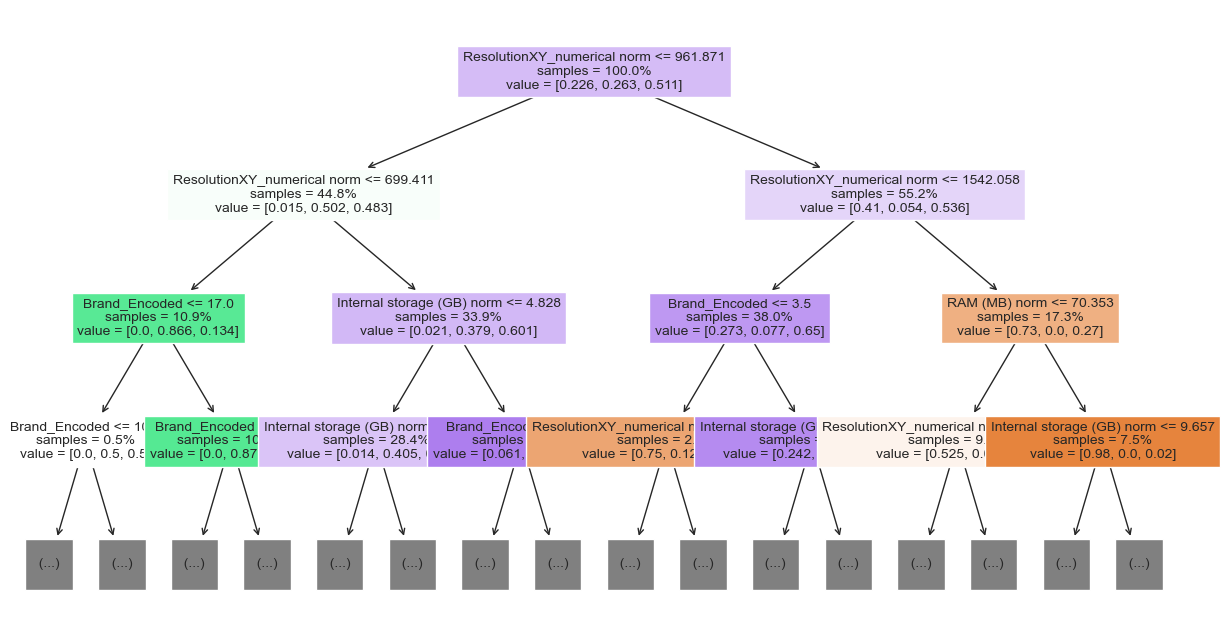

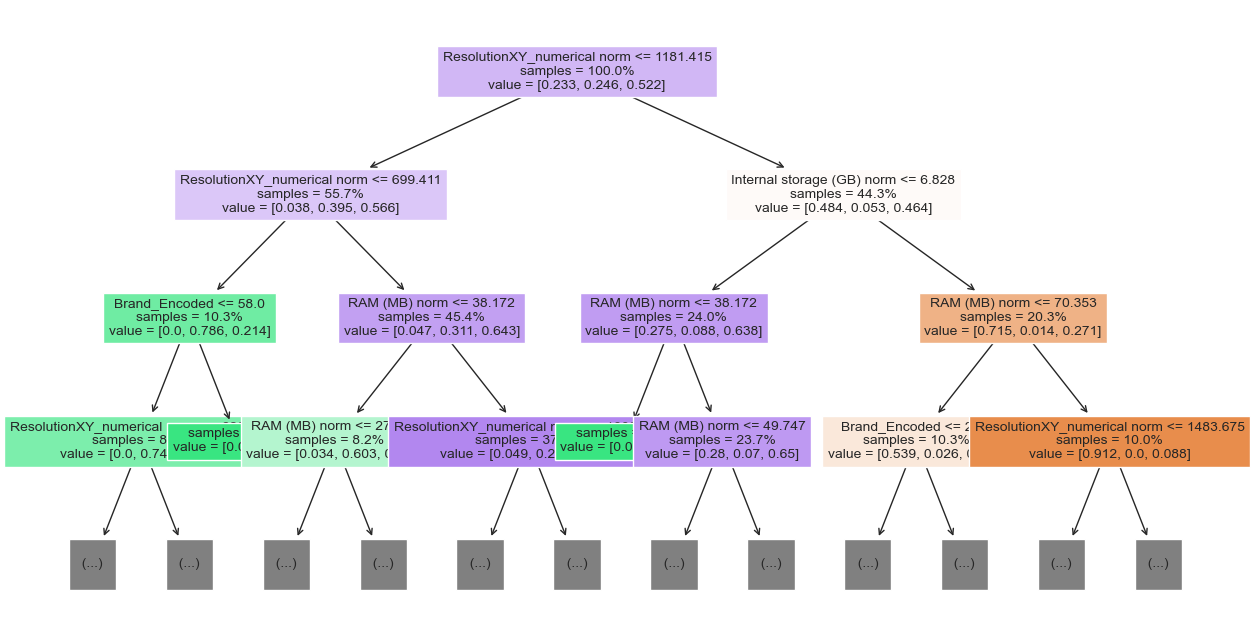

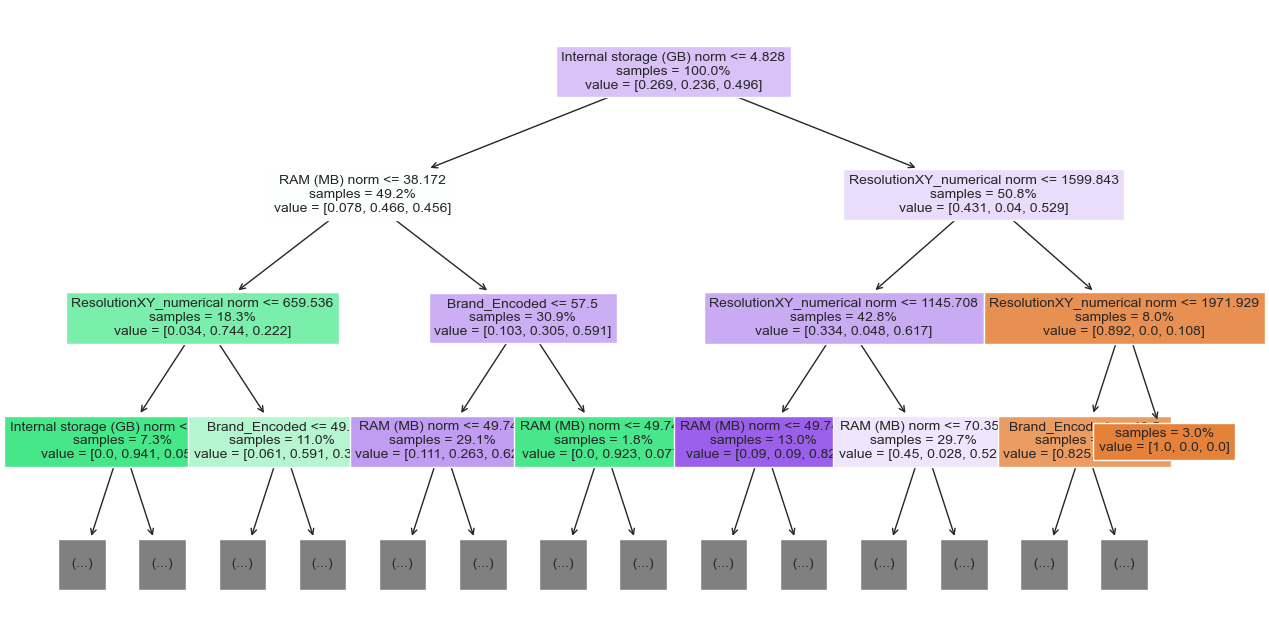

In [26]:
for i in range(3):
    tree = rf_classifier.estimators_[i]
    
    plt.figure(figsize=(15, 8))
    plot_tree(tree, 
              feature_names=X_train.columns.tolist(),  # Convert Index to list
              filled=True,  
              max_depth=3, 
              impurity=False, 
              proportion=True,
            fontsize=10)
    
    plt.show()


# Prediction Example

We will be using Vivo Y03, a SGD129 phone, as an example to test our prediction model.

In [40]:
# Step 6: Prediction
# Now you can use this trained model to predict on new data
# For example:
new_data = pd.DataFrame({
    'Brand': ['Vivo'],
    'RAM (MB) norm': np.sqrt([4000]),
    'Internal storage (GB) norm': np.sqrt([64]),
    'ResolutionXY_numerical norm': np.sqrt([720 * 1612])
})

# Encoding brand for new data
new_data['Brand_Encoded'] = label_encoder.transform(new_data['Brand'])

# Making prediction
predicted_price_category = rf_classifier.predict(new_data[features])
print("Predicted Price Category:", predicted_price_category)

Predicted Price Category: ['Mid']
